# Упражнение 19.1 — Одномерная минимизация

## Условие

Минимизировать функцию:

$$
f(x) = \frac{11}{1 + e^{-x}} + 7 \cos(3x) + x^2 - 1
$$


на интервале `[-5, 5]`.

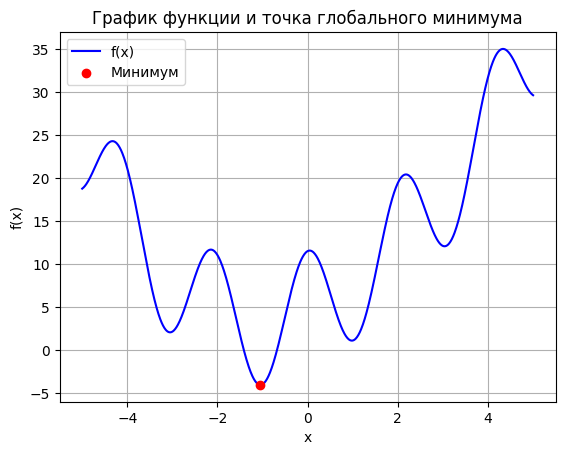

Минимум в точке: -1.0475116874093373
Значение функции: -4.0459808315904064


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f(x):
    return 11 / (1 + np.exp(-x)) + 7 * np.cos(3 * x) + x**2 - 1

result = minimize_scalar(f, bounds=(-5, 5))

# Визуализация
x_vals = np.linspace(-5, 5, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.scatter(result.x, result.fun, color='red', label='Минимум', zorder=5)
plt.title("График функции и точка глобального минимума")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Минимум в точке: {result.x}")
print(f"Значение функции: {result.fun}")


# Упражнение 20.2 (Безусловная оптимизация)

## Условие задачи

Найти минимум функции:

$$f(x,y) = 7x^2 + 3xy + 9y^2 + 8\exp\left[-\left(\frac{x^2}{3} - \frac{(y+3)^2}{5}\right)\right] + 9\exp\left[-\left(\frac{(x-1)^2}{5} + \frac{(y-2)^2}{2}\right)\right]$$

Используйте различные методы оптимизации:
1. Метод Нелдера-Мида
2. Метод локальной вариации (PRAXIS)
3. Метод BFGS
4. Метод Ньютона

Стартовая точка для всех методов: $x_0 = (0, 0)$


## Метод: Нелдер-Мида
Количество итераций: 101
Вызовов функции: 197
Вызовов градиента: 0
Финальное значение функции: 25.353520597360724
Решение: x1 = 0.779519565805534, x2 = -0.8940132544928863

Вызовы функций:
       Функция  Количество
0       eval_f         197
1  eval_grad_f           0


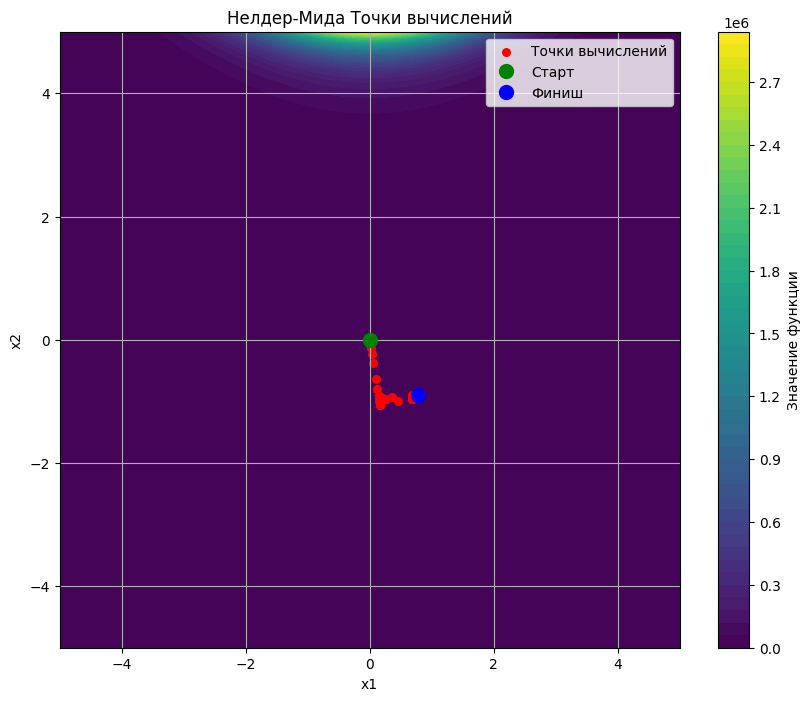

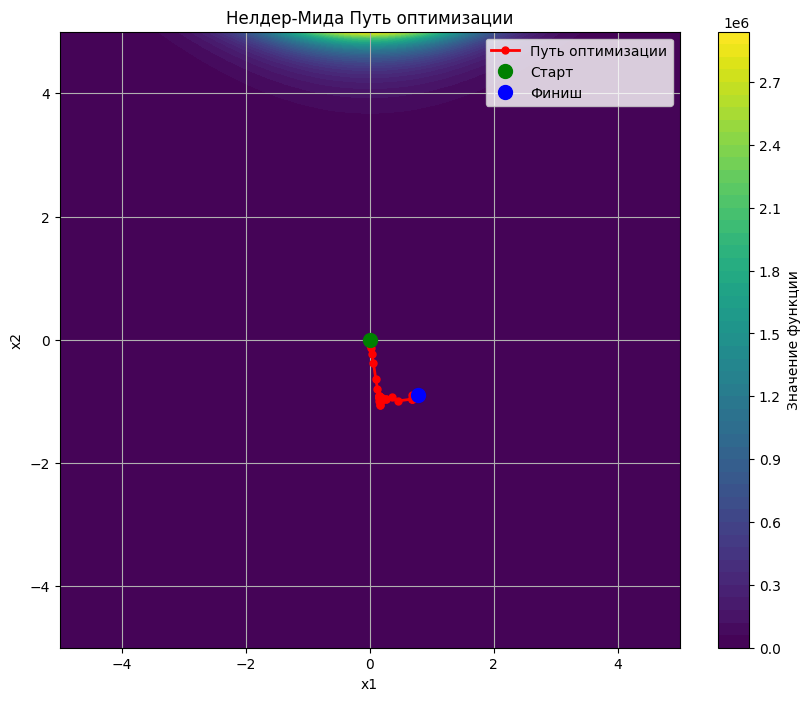

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as optimize
from matplotlib.colors import LogNorm
import pandas as pd

def objective_function(x):
    x1, x2 = x
    return (7 * x1**2 + 3 * x1 * x2 + 9 * x2**2 +
            8 * np.exp(-(x1**2 / 3 - (x2 + 3)**2 / 5)) +
            9 * np.exp(-((x1 - 1)**2 / 5 + (x2 - 2)**2 / 2)))

def gradient_function(x):
    x1, x2 = x
    
    term_A_exponent = -(x1**2 / 3 - (x2 + 3)**2 / 5)
    term_B_exponent = -((x1 - 1)**2 / 5 + (x2 - 2)**2 / 2)
    
    exp_A = np.exp(term_A_exponent)
    exp_B = np.exp(term_B_exponent)
    
    # df/dx1
    df_dx1 = (14 * x1 + 3 * x2 + 
              8 * exp_A * (-2 * x1 / 3) + 
              9 * exp_B * (-2 * (x1 - 1) / 5))
              
    # df/dx2
    df_dx2 = (3 * x1 + 18 * x2 + 
              8 * exp_A * (2 * (x2 + 3) / 5) + 
              9 * exp_B * (-(x2 - 2)))
    
    return np.array([df_dx1, df_dx2])

# Создание контурного графика целевой функции
def create_contour_plot(title):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = objective_function([X[i, j], Y[i, j]])
    
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(label='Значение функции')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    return plt, X, Y, Z

# отслеживания шагов оптимизации
def trace_optimization(method, x0, options=None, jac=None):
    iterations = []
    function_values = []
    points = []
    function_calls = 0
    gradient_calls = 0
    
    def callback(xk):
        nonlocal function_calls
        function_calls += 1
        iterations.append(len(iterations))
        function_values.append(objective_function(xk))
        points.append(xk.copy())
    
    if options is None:
        options = {'xtol': 1e-8, 'disp': True}
    
    if jac is not None:
        result = optimize.minimize(
            objective_function, 
            x0, 
            method=method,
            jac=jac,
            callback=callback,
            options=options
        )
        gradient_calls = result.njev if hasattr(result, 'njev') else 'Н/Д'
    else:
        result = optimize.minimize(
            objective_function, 
            x0, 
            method=method,
            callback=callback,
            options=options
        )
    
    # Обновление счетчика вызовов функции
    if hasattr(result, 'nfev'):
        function_calls = result.nfev
    
    return {
        'result': result,
        'iterations': iterations,
        'function_values': function_values,
        'points': np.array(points),
        'function_calls': function_calls,
        'gradient_calls': gradient_calls
    }

# Построение пути оптимизации на контурном графике
def plot_optimization_path(trace, title):
    plt, X, Y, Z = create_contour_plot(f"{title} Путь оптимизации")
    
    path = trace['points']
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=5, linewidth=2, label='Путь оптимизации')
    
    # Отметка начальной и конечной точек
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=10, label='Старт')
    plt.plot(path[-1, 0], path[-1, 1], 'bo', markersize=10, label='Финиш')
    
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_evaluation_points(trace, title):
    plt, X, Y, Z = create_contour_plot(f"{title} Точки вычислений")
    
    # Построение точек вычислений
    path = trace['points']
    plt.scatter(path[:, 0], path[:, 1], c='red', s=30, label='Точки вычислений')
    
    # Отметка начальной и конечной точек
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=10, label='Старт')
    plt.plot(path[-1, 0], path[-1, 1], 'bo', markersize=10, label='Финиш')
    
    plt.legend()
    plt.grid(True)
    plt.show()

def display_stats(trace, method_name):
    result = trace['result']
    
    print(f"Количество итераций: {len(trace['iterations'])}")
    print(f"Вызовов функции: {trace['function_calls']}")
    
    if trace['gradient_calls'] != 'Н/Д':
        print(f"Вызовов градиента: {trace['gradient_calls']}")
    
    print(f"Финальное значение функции: {result.fun}")
    print(f"Решение: x1 = {result.x[0]}, x2 = {result.x[1]}")
    
    # Создание DataFrame для подсчета вызовов
    data = {'Функция': ['eval_f']}
    if trace['gradient_calls'] != 'Н/Д':
        data['Функция'].append('eval_grad_f')
    
    data['Количество'] = [trace['function_calls']]
    if trace['gradient_calls'] != 'Н/Д':
        data['Количество'].append(trace['gradient_calls'])
    
    df = pd.DataFrame(data)
    print("\nВызовы функций:")
    print(df)

# Начальная точка
x0 = np.array([0, 0])

# 1. Метод Нелдера-Мида
print("\n## Метод: Нелдер-Мида")
trace_nm = trace_optimization(
    method='Nelder-Mead',
    x0=x0,
    options={'xatol': 1e-8, 'maxiter': 200}
)
display_stats(trace_nm, "Нелдер-Мида")
plot_evaluation_points(trace_nm, "Нелдер-Мида")
plot_optimization_path(trace_nm, "Нелдер-Мида")



Метод Пауэлла


## Метод: Пауэлла (аналог PRAXIS)
Количество итераций: 3
Вызовов функции: 99
Вызовов градиента: 0
Финальное значение функции: 25.35352074193934
Решение: x1 = 0.7795477629196175, x2 = -0.8940982441748122

Вызовы функций:
       Функция  Количество
0       eval_f          99
1  eval_grad_f           0


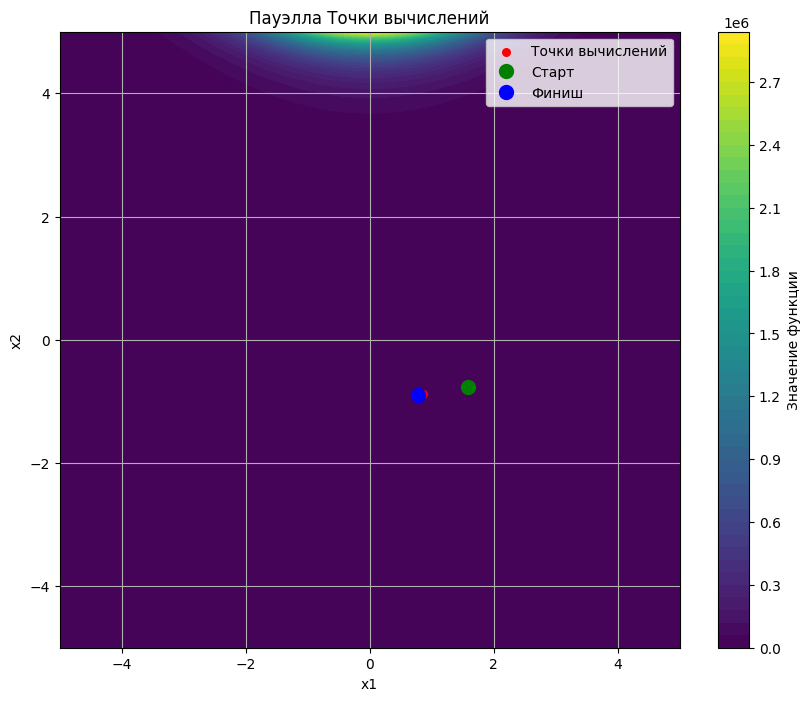

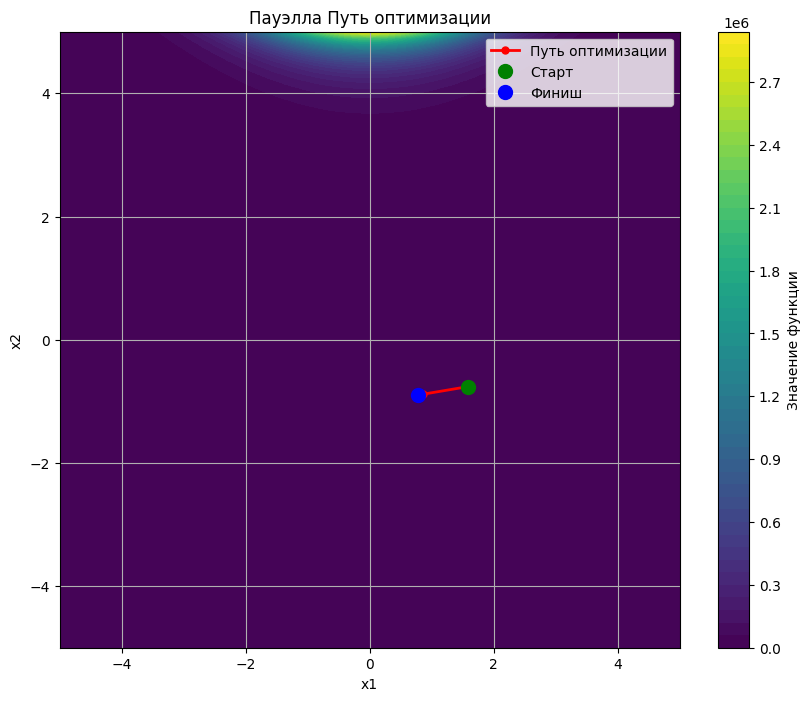

In [9]:
print("\n## Метод: Пауэлла (аналог PRAXIS)")
trace_powell = trace_optimization(
    method='Powell',
    x0=x0,
    options={'xtol': 1e-8, 'maxiter': 200}
)
display_stats(trace_powell, "Пауэлла")
plot_evaluation_points(trace_powell, "Пауэлла")
plot_optimization_path(trace_powell, "Пауэлла")

Метод BFGS


## Метод: BFGS
Количество итераций: 9
Вызовов функции: 48
Вызовов градиента: 37
Финальное значение функции: 25.353520597360728
Решение: x1 = 0.7795195941235908, x2 = -0.894013261842999

Вызовы функций:
       Функция  Количество
0       eval_f          48
1  eval_grad_f          37


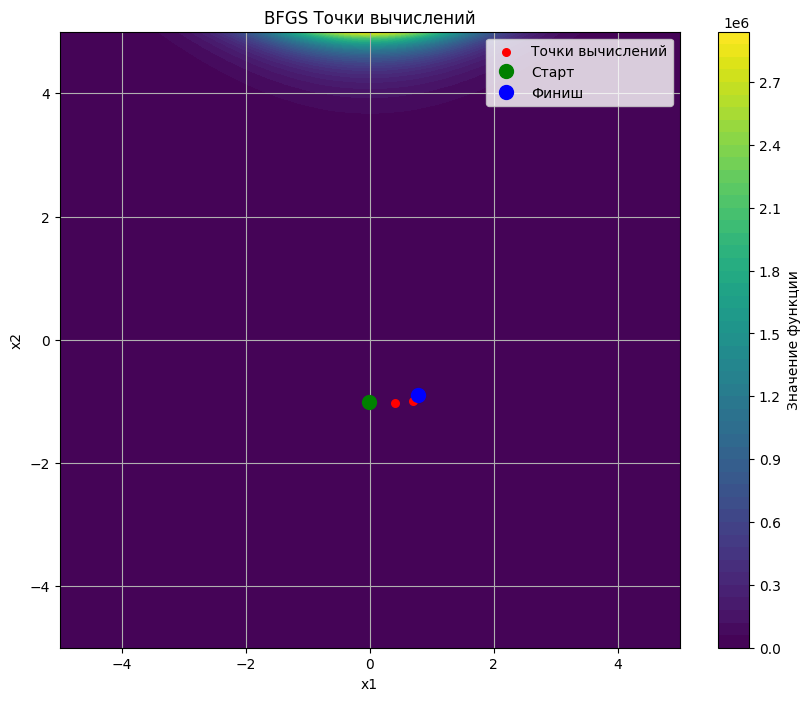

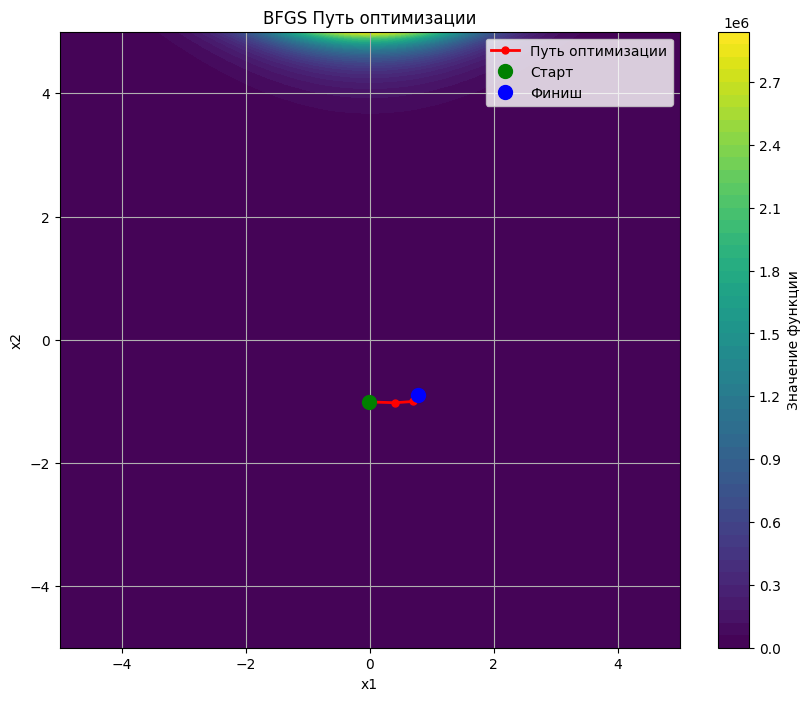

In [10]:

print("\n## Метод: BFGS")
trace_bfgs = trace_optimization(
    method='BFGS',
    x0=x0,
    jac=gradient_function,
    options={'gtol': 1e-8}
)
display_stats(trace_bfgs, "BFGS")
plot_evaluation_points(trace_bfgs, "BFGS")
plot_optimization_path(trace_bfgs, "BFGS")

Метод Ньютона-КГ


## Метод: Ньютона-КГ
Количество итераций: 8
Вызовов функции: 10
Вызовов градиента: 29
Финальное значение функции: 25.353520597360724
Решение: x1 = 0.779519576786294, x2 = -0.8940132561895039

Вызовы функций:
       Функция  Количество
0       eval_f          10
1  eval_grad_f          29


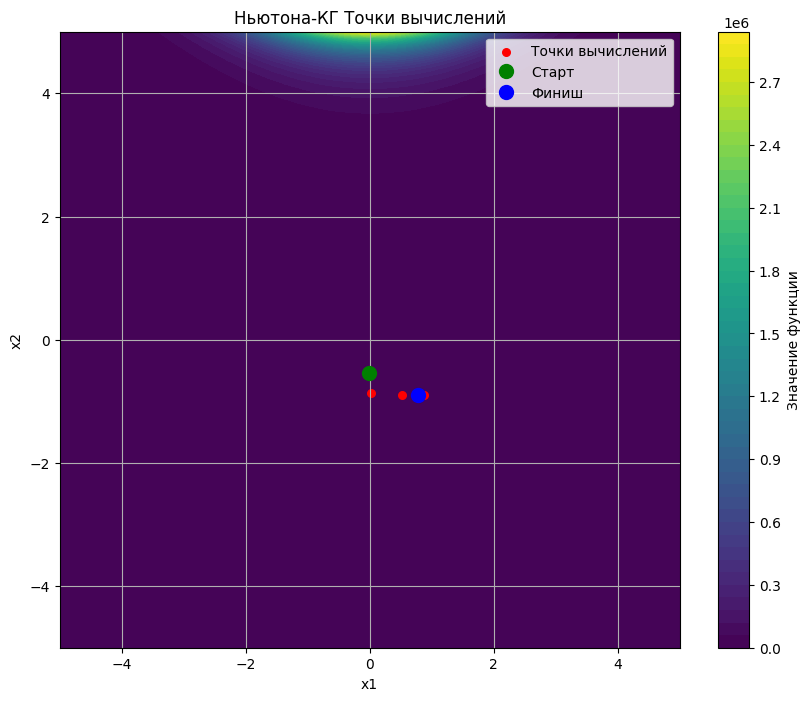

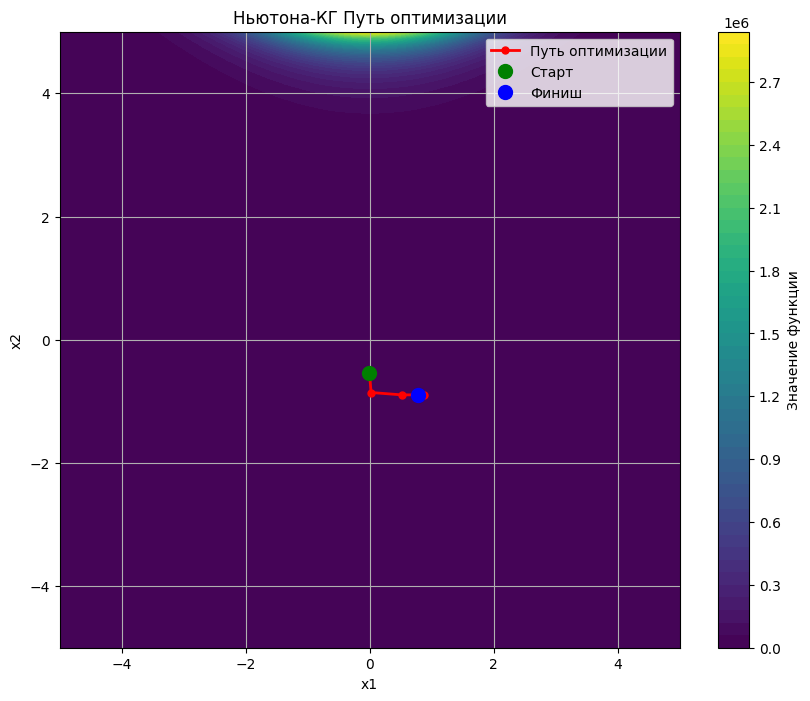

In [11]:

print("\n## Метод: Ньютона-КГ")
trace_newton = trace_optimization(
    method='Newton-CG',
    x0=x0,
    jac=gradient_function,
    options={'xtol': 1e-8}
)
display_stats(trace_newton, "Ньютона-КГ")
plot_evaluation_points(trace_newton, "Ньютона-КГ")
plot_optimization_path(trace_newton, "Ньютона-КГ")



# Упражнение 19.3

Минимизировать функцию `f(x1, x2)` при следующих ограничениях:

```math
g_1(x_1, x_2) = \frac{x_1^2}{10} + \frac{x_2^2}{3} - \frac{x_1 x_2}{5} - 6 \leq 0  
```

```math
g_2(x_1, x_2) = \frac{x_1^2}{3} + \frac{x_2^2}{10} + \frac{x_1 x_2}{5} - 3 \leq 0
```

Применить метод численной оптимизации с учетом ограничений (например, метод COBYLA и MMA).

In [12]:
import nlopt

# Целевая функция
def f(x, grad=None):
    return 11 / (1 + np.exp(-x[0])) + 7 * np.cos(3 * x[0]) + x[0]**2 - 1 + x[1]**2

# Неравенства: g(x) <= 0
def g1(x, grad=None):
    return (x[0]**2 / 10) + (x[1]**2 / 3) - (x[0] * x[1] / 5) - 6

def g2(x, grad=None):
    return (x[0]**2 / 3) + (x[1]**2 / 10) + (x[0] * x[1] / 5) - 3

opt = nlopt.opt(nlopt.LN_COBYLA, 2)
opt.set_min_objective(f)
opt.add_inequality_constraint(g1, 1e-8)
opt.add_inequality_constraint(g2, 1e-8)
opt.set_xtol_rel(1e-8)
opt.set_lower_bounds([-5, -5])
opt.set_upper_bounds([5, 5])

x0 = [0.0, 0.0]
x_opt = opt.optimize(x0)
min_val = opt.last_optimum_value()

print("COBYLA:")
print(f"Минимум в точке: {x_opt}")
print(f"Значение функции: {min_val}")


COBYLA:
Минимум в точке: [-1.04751197e+00 -6.95223495e-08]
Значение функции: -4.045980831592861


In [13]:
def f_with_grad(x, grad):
    if grad.size > 0:
        grad[0] = -11 * np.exp(-x[0]) / (1 + np.exp(-x[0]))**2 - 21 * np.sin(3 * x[0]) + 2 * x[0]
        grad[1] = 2 * x[1]
    return f(x)

def g1_with_grad(x, grad):
    if grad.size > 0:
        grad[0] = (2 * x[0] / 10) - (x[1] / 5)
        grad[1] = (2 * x[1] / 3) - (x[0] / 5)
    return g1(x)

def g2_with_grad(x, grad):
    if grad.size > 0:
        grad[0] = (2 * x[0] / 3) + (x[1] / 5)
        grad[1] = (2 * x[1] / 10) + (x[0] / 5)
    return g2(x)

opt_mma = nlopt.opt(nlopt.LD_MMA, 2)
opt_mma.set_min_objective(f_with_grad)
opt_mma.add_inequality_constraint(g1_with_grad, 1e-8)
opt_mma.add_inequality_constraint(g2_with_grad, 1e-8)
opt_mma.set_xtol_rel(1e-8)
opt_mma.set_lower_bounds([-5, -5])
opt_mma.set_upper_bounds([5, 5])

x_opt_mma = opt_mma.optimize([0.0, 0.0])
min_val_mma = opt_mma.last_optimum_value()

print("MMA:")
print(f"Минимум в точке: {x_opt_mma}")
print(f"Значение функции: {min_val_mma}")


MMA:
Минимум в точке: [1.03384361 0.        ]
Значение функции: 1.1887133583322305


# Упражнение 20.4 (Оптимизация овражной функции)

## Условие задачи

Найти минимум овражной функции:

$$f(x,y) = (9x+8y-5)^4+(5x+2y-1)^4$$

Исследуйте поведение различных методов оптимизации:
1. Метод Нелдера-Мида
2. Метод Ньютона

Стартовая точка для всех методов: $x_0 = (0, 0)$

Сравните эффективность методов для данной овражной функции.


## Метод: Нелдера-Мида (Овраг)
Результат оптимизации (Нелдер-Мид):
Успех: True
Статус: 0
Сообщение: Optimization terminated successfully.
Вызовы функции: 196
Решение: x = -0.09090909, y = 0.72727272
Значение функции: 0.00000000


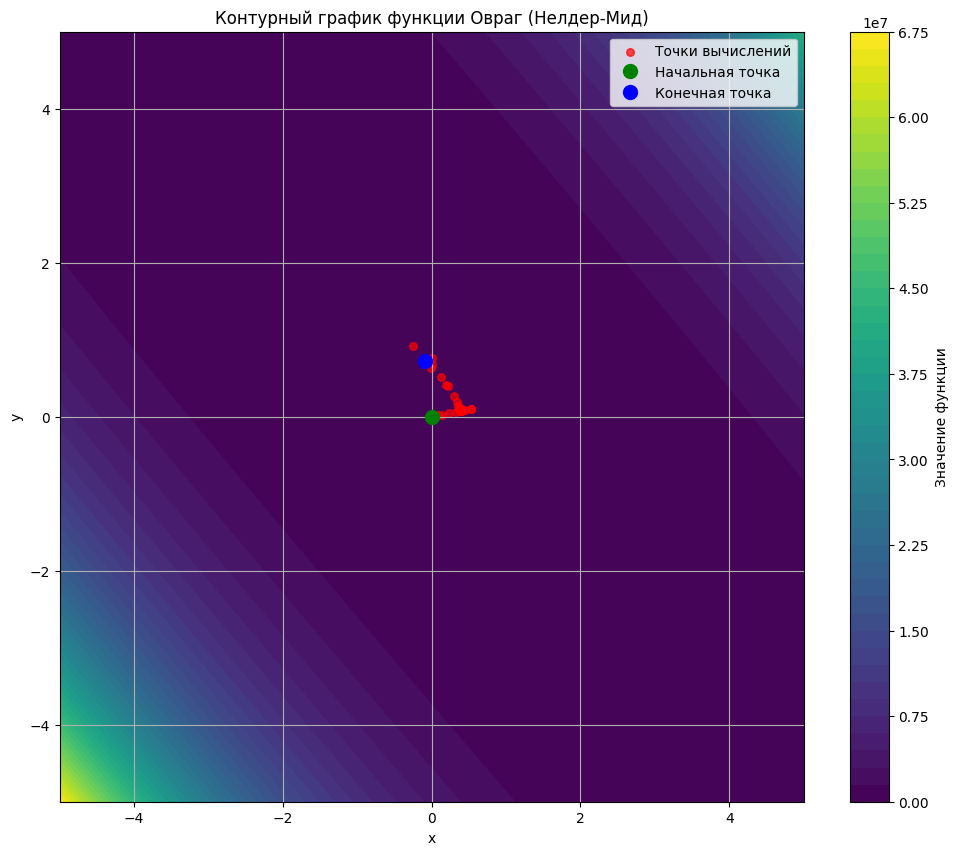

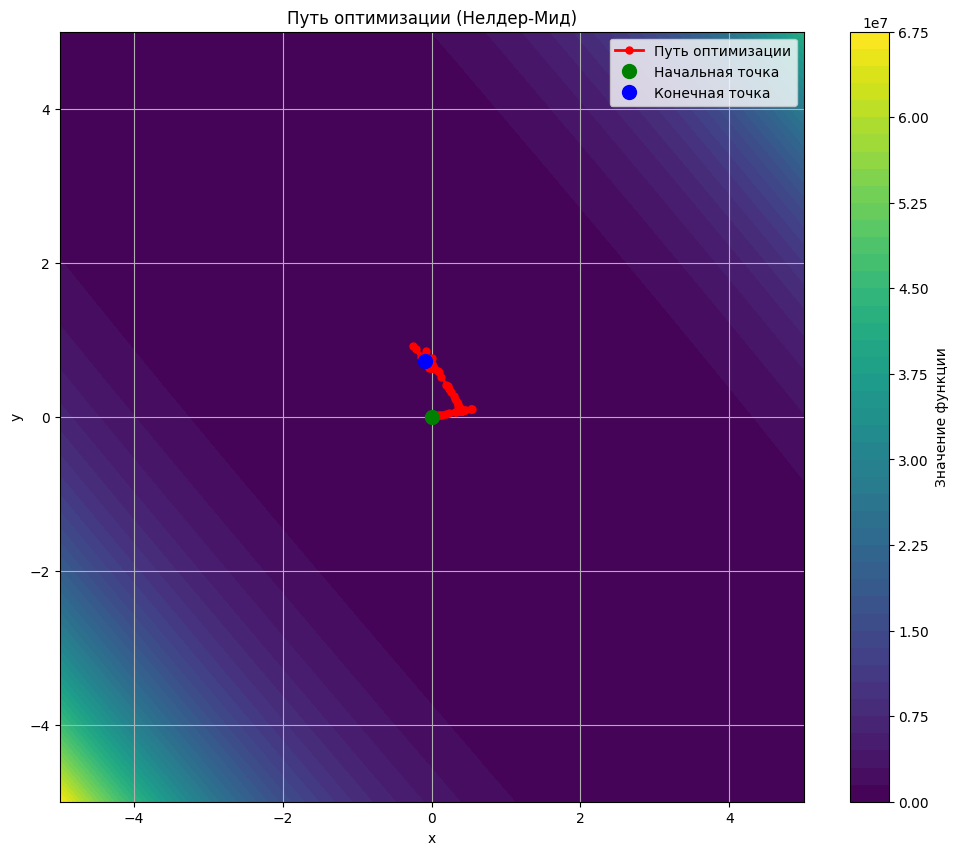


Вызовы функций (Нелдер-Мид):
  Функция  Количество
0  eval_f         196

## Метод: Ньютона (Овраг)
Результат оптимизации (Ньютон):
Успех: True
Статус: 0
Сообщение: Optimization terminated successfully.
Вызовы функции: 23
Вызовы градиента: 77
Решение: x = -0.08915702, y = 0.72492513
Значение функции: 0.00000000


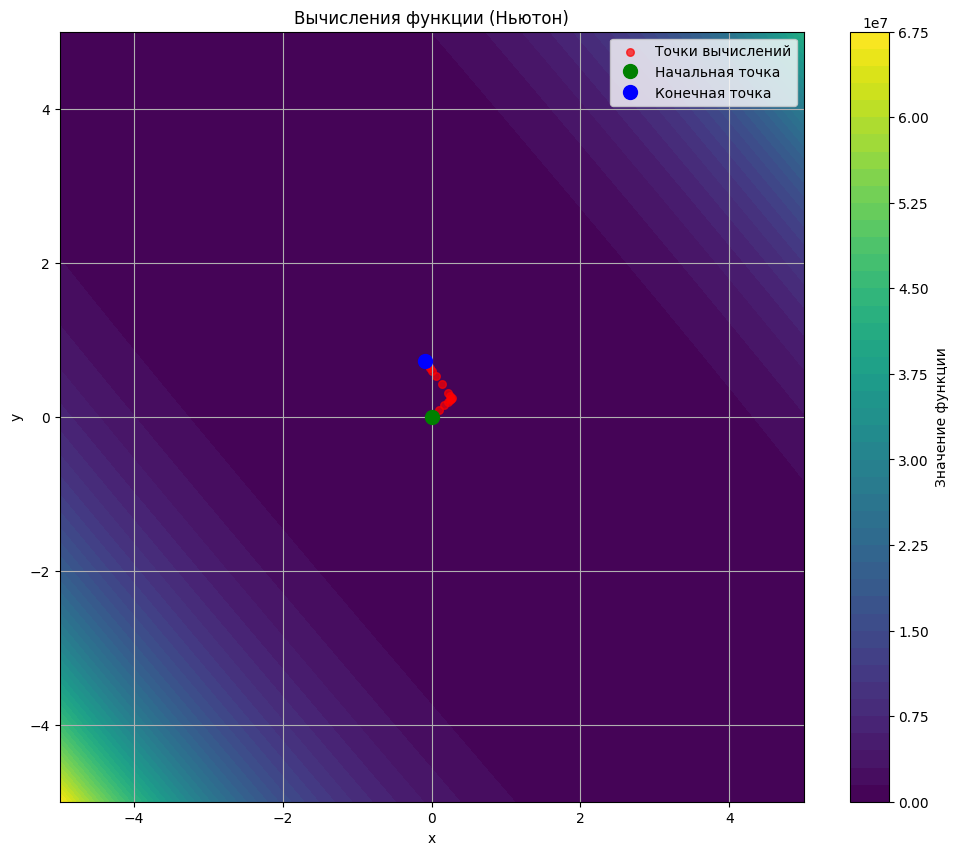

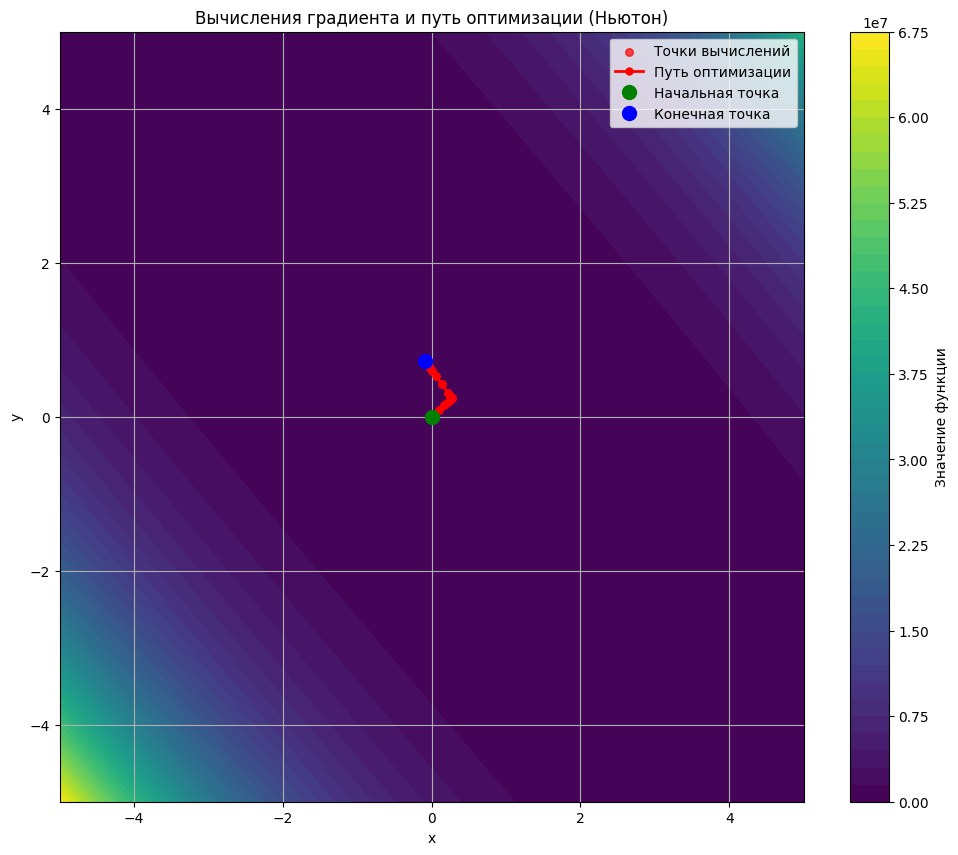

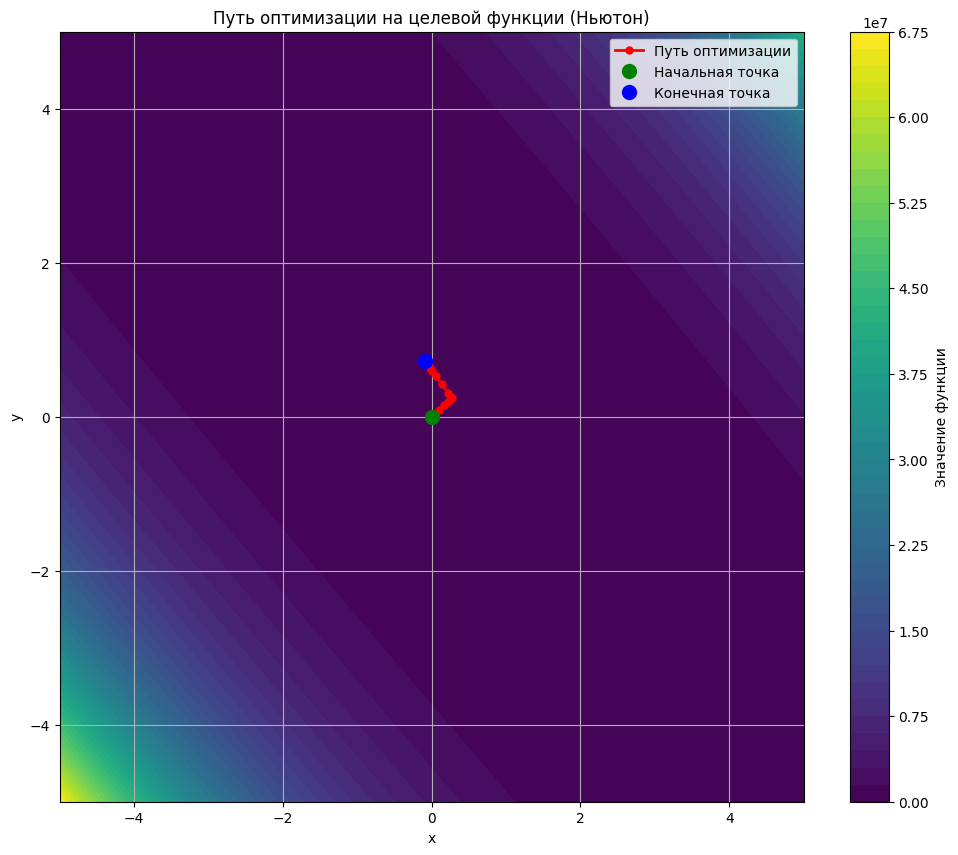


Вызовы функций (Ньютон):
       Функция  Количество
0       eval_f          23
1  eval_grad_f          77


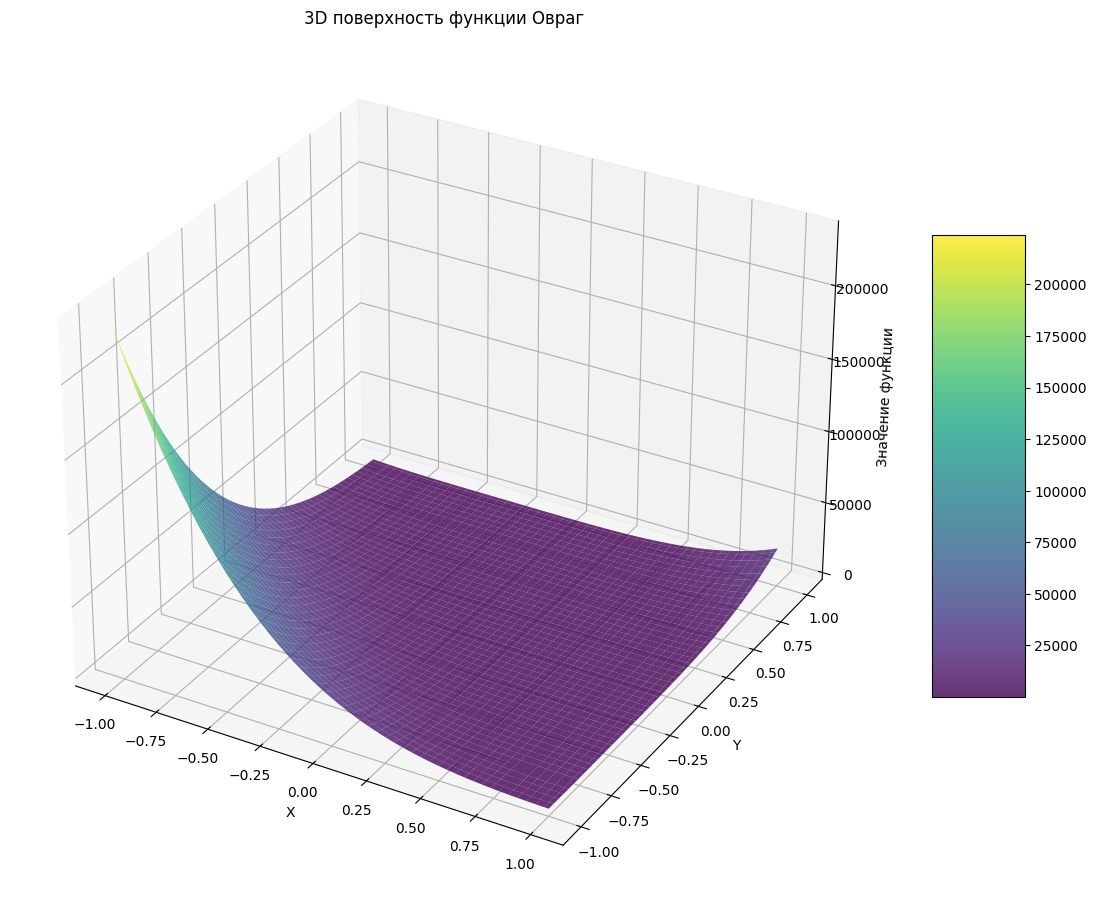

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as optimize
import pandas as pd

def ravine_function(vars):
    x, y = vars
    term1 = (9 * x + 8 * y - 5)**4
    term2 = (5 * x + 2 * y - 1)**4
    return term1 + term2

# градиент
def ravine_gradient(vars):
    x, y = vars
    
    # df/dx
    df_dx = 4 * (9 * x + 8 * y - 5)**3 * 9 + 4 * (5 * x + 2 * y - 1)**3 * 5
    
    # df/dy
    df_dy = 4 * (9 * x + 8 * y - 5)**3 * 8 + 4 * (5 * x + 2 * y - 1)**3 * 2
    
    return np.array([df_dx, df_dy])

# контурного графика целевой функции
def create_contour_plot(title, xlim=(-5, 5), ylim=(-5, 5), resolution=100):
    x = np.linspace(xlim[0], xlim[1], resolution)
    y = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = ravine_function([X[i, j], Y[i, j]])
    
    plt.figure(figsize=(12, 10))
    contour = plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(label='Значение функции')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    
    return plt, X, Y, Z

def uni_sample(points, max_samples=100):
    n = len(points)
    if n <= max_samples:
        return points
    indices = np.linspace(0, n-1, max_samples, dtype=int)
    return [points[i] for i in indices]

def trace_optimization(method, x0, options=None, jac=None, bounds=None):
    # Установка параметров по умолчанию
    if options is None:
        if method == 'Nelder-Mead':
            options = {'xatol': 1e-8, 'maxiter': 500}
        else:
            options = {'xtol': 1e-8}
    
    # Инициализация переменных для отслеживания
    history = {'x': [], 'fun': [], 'grad': []}
    function_calls = 0
    gradient_calls = 0
    
    # Функции-обертки для отслеживания вызовов
    def objective_wrapper(x):
        nonlocal function_calls
        function_calls += 1
        value = ravine_function(x)
        history['x'].append(x.copy())
        history['fun'].append(value)
        return value
    
    def gradient_wrapper(x):
        nonlocal gradient_calls
        gradient_calls += 1
        grad = ravine_gradient(x)
        history['grad'].append(grad.copy())
        return grad
    
    # Запуск оптимизации
    if jac is not None:
        result = optimize.minimize(
            objective_wrapper, 
            x0, 
            method=method,
            jac=gradient_wrapper,
            options=options,
            bounds=bounds
        )
    else:
        result = optimize.minimize(
            objective_wrapper, 
            x0, 
            method=method,
            options=options,
            bounds=bounds
        )
    
    path_points = np.array(history['x'])
    
    eval_data = {
        'eval_f': [(x, f) for x, f in zip(history['x'], history['fun'])]
    }
    
    if jac is not None:
        eval_data['eval_grad_f'] = [(x, g) for x, g in zip(history['x'], history['grad'])]
    
    return {
        'result': result,
        'path': path_points,
        'eval': eval_data,
        'count': {
            'eval_f': function_calls,
            'eval_grad_f': gradient_calls if jac is not None else 0
        }
    }

def plot_eval_points(plt_obj, eval_points, sample_size=100):
    sampled_points = uni_sample(eval_points, sample_size)
    
    x_vals = [p[0][0] for p in sampled_points]
    y_vals = [p[0][1] for p in sampled_points]
    
    plt_obj.scatter(x_vals, y_vals, c='red', s=30, alpha=0.7, label='Точки вычислений')
    
    return plt_obj

def plot_start_stop_points(plt_obj, eval_points):
    if len(eval_points) == 0:
        return plt_obj
    
    start_x, start_y = eval_points[0][0]
    
    end_x, end_y = eval_points[-1][0]
    
    plt_obj.plot(start_x, start_y, 'go', markersize=10, label='Начальная точка')
    
    plt_obj.plot(end_x, end_y, 'bo', markersize=10, label='Конечная точка')
    
    return plt_obj

# путь оптимизации
def plot_path_points(plt_obj, path_points):
    # Извлечение координат x и y
    x_vals = path_points[:, 0]
    y_vals = path_points[:, 1]
    
    plt_obj.plot(x_vals, y_vals, 'r-o', markersize=5, linewidth=2, label='Путь оптимизации')
    
    return plt_obj

x0_ravine = np.array([0, 0])

# Границы 
bounds = [(-5, 5), (-5, 5)]

# 1. Метод Нелдера-Мида
print("\n## Метод: Нелдера-Мида (Овраг)")
trace_nm_ravine = trace_optimization(
    method='Nelder-Mead',
    x0=x0_ravine,
    options={'xatol': 1e-8, 'maxiter': 500}
)

print("Результат оптимизации (Нелдер-Мид):")
print(f"Успех: {trace_nm_ravine['result'].success}")
print(f"Статус: {trace_nm_ravine['result'].status}")
print(f"Сообщение: {trace_nm_ravine['result'].message}")
print(f"Вызовы функции: {trace_nm_ravine['count']['eval_f']}")
print(f"Решение: x = {trace_nm_ravine['result'].x[0]:.8f}, y = {trace_nm_ravine['result'].x[1]:.8f}")
print(f"Значение функции: {trace_nm_ravine['result'].fun:.8f}")

# Создание контурного графика для метода Нелдера-Мида
plt_nm, X_nm, Y_nm, Z_nm = create_contour_plot("Контурный график функции Овраг (Нелдер-Мид)")

# Построение точек вычислений
plt_nm = plot_eval_points(plt_nm, trace_nm_ravine['eval']['eval_f'])
plt_nm = plot_start_stop_points(plt_nm, trace_nm_ravine['eval']['eval_f'])
plt_nm.legend()
plt_nm.savefig('nelder_mead_ravine_eval_points.png', dpi=300, bbox_inches='tight')
plt_nm.show()

# Построение пути оптимизации
plt_path_nm, _, _, _ = create_contour_plot("Путь оптимизации (Нелдер-Мид)")
plt_path_nm = plot_path_points(plt_path_nm, trace_nm_ravine['path'])
plt_path_nm = plot_start_stop_points(plt_path_nm, trace_nm_ravine['eval']['eval_f'])
plt_path_nm.legend()
plt_path_nm.savefig('nelder_mead_ravine_path.png', dpi=300, bbox_inches='tight')
plt_path_nm.show()

# Вывод количества вызовов функций
print("\nВызовы функций (Нелдер-Мид):")
nm_calls_df = pd.DataFrame({
    'Функция': ['eval_f'],
    'Количество': [trace_nm_ravine['count']['eval_f']]
})
print(nm_calls_df)

# 2. Метод Ньютона (Newton-CG в scipy)
print("\n## Метод: Ньютона (Овраг)")
trace_newton_ravine = trace_optimization(
    method='Newton-CG',
    x0=x0_ravine,
    jac=True,
    options={'xtol': 1e-8}
)

print("Результат оптимизации (Ньютон):")
print(f"Успех: {trace_newton_ravine['result'].success}")
print(f"Статус: {trace_newton_ravine['result'].status}")
print(f"Сообщение: {trace_newton_ravine['result'].message}")
print(f"Вызовы функции: {trace_newton_ravine['count']['eval_f']}")
print(f"Вызовы градиента: {trace_newton_ravine['count']['eval_grad_f']}")
print(f"Решение: x = {trace_newton_ravine['result'].x[0]:.8f}, y = {trace_newton_ravine['result'].x[1]:.8f}")
print(f"Значение функции: {trace_newton_ravine['result'].fun:.8f}")

# Создание контурного графика для метода Ньютона - вычисления функции
plt_newton_func, X_n, Y_n, Z_n = create_contour_plot("Вычисления функции (Ньютон)")
plt_newton_func = plot_eval_points(plt_newton_func, trace_newton_ravine['eval']['eval_f'])
plt_newton_func = plot_start_stop_points(plt_newton_func, trace_newton_ravine['eval']['eval_f'])
plt_newton_func.legend()
plt_newton_func.savefig('newton_ravine_func_eval.png', dpi=300, bbox_inches='tight')
plt_newton_func.show()

# Создание контурного графика для метода Ньютона - вычисления градиента и путь оптимизации
plt_newton_grad, _, _, _ = create_contour_plot("Вычисления градиента и путь оптимизации (Ньютон)")
plt_newton_grad = plot_eval_points(plt_newton_grad, trace_newton_ravine['eval']['eval_grad_f'])
plt_newton_grad = plot_path_points(plt_newton_grad, trace_newton_ravine['path'])
plt_newton_grad = plot_start_stop_points(plt_newton_grad, trace_newton_ravine['eval']['eval_grad_f'])
plt_newton_grad.legend()
plt_newton_grad.savefig('newton_ravine_grad_eval.png', dpi=300, bbox_inches='tight')
plt_newton_grad.show()

# Создание контурного графика для метода Ньютона - путь оптимизации
plt_newton_path, _, _, _ = create_contour_plot("Путь оптимизации на целевой функции (Ньютон)")
plt_newton_path = plot_path_points(plt_newton_path, trace_newton_ravine['path'])
plt_newton_path = plot_start_stop_points(plt_newton_path, trace_newton_ravine['eval']['eval_f'])
plt_newton_path.legend()
plt_newton_path.savefig('newton_ravine_path.png', dpi=300, bbox_inches='tight')
plt_newton_path.show()

# Вывод количества вызовов функций
print("\nВызовы функций (Ньютон):")
newton_calls_df = pd.DataFrame({
    'Функция': ['eval_f', 'eval_grad_f'],
    'Количество': [
        trace_newton_ravine['count']['eval_f'],
        trace_newton_ravine['count']['eval_grad_f']
    ]
})
print(newton_calls_df)

# 3D визуализация функции Овраг
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Генерация данных для 3D графика
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = ravine_function([X[i, j], Y[i, j]])

# Создание поверхности
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8, 
                        linewidth=0, antialiased=True)

# Добавление цветовой шкалы
fig.colorbar(surf, shrink=0.5, aspect=5)

# Установка подписей и заголовка
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Значение функции')
ax.set_title('3D поверхность функции Овраг')

plt.savefig('ravine_3d_surface.png', dpi=300, bbox_inches='tight')
plt.show()
    

Упражнение 21.4 (Овраг) Найти минимум функции 
(9x + 8y - 5) ^ 4 + (5x + 2y - 1) ^ 4 
Применить 
Метод Нелдера-Мида 
и Ньютона


Метод Нелдера-Мида:
Оптимальная точка: x = [-0.09094432  0.72732751]
Минимальное значение функции: f(x) = 2.353106529301087e-16
Количество итераций: 68
Количество вычислений функции: 133

Метод Ньютона:
Оптимальная точка: x = [-0.08915963  0.72492879]
Минимальное значение функции: f(x) = 3.532436422335481e-10
Количество итераций: 22
Количество вычислений функции: 22


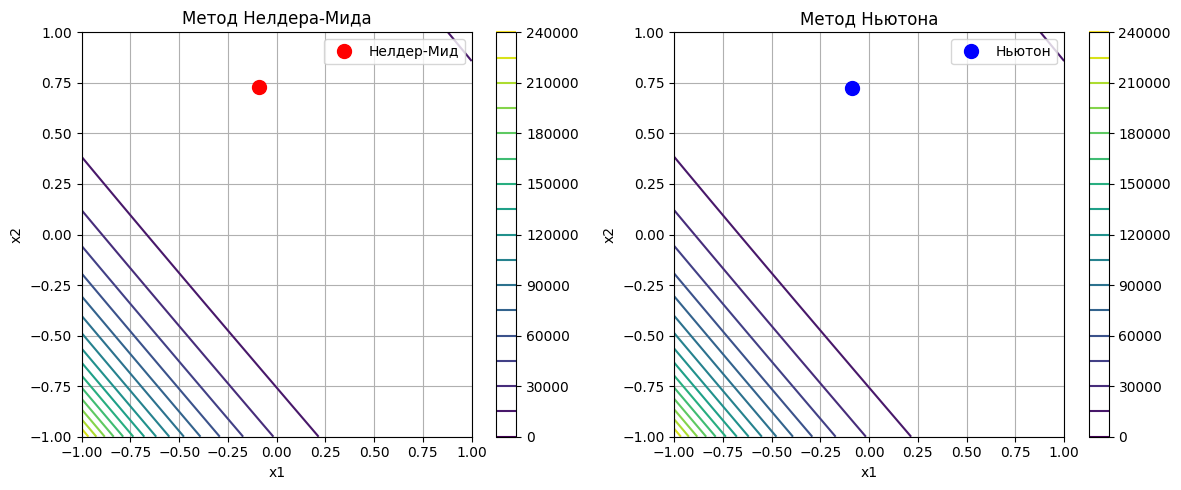


Аналитическое решение:
Точка минимума: x = [-0.09090909  0.72727273]
Значение функции в минимуме: f(x) = 0.0

Сравнение методов:
Нелдер-Мид - отклонение от аналитического решения: 0.000065
Ньютон - отклонение от аналитического решения: 0.002925


In [15]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def objective_function(x):
    return (9*x[0] + 8*x[1] - 5)**4 + (5*x[0] + 2*x[1] - 1)**4

def gradient(x):
    term1 = 9*x[0] + 8*x[1] - 5
    term2 = 5*x[0] + 2*x[1] - 1
    
    df_dx1 = 4 * term1**3 * 9 + 4 * term2**3 * 5
    df_dx2 = 4 * term1**3 * 8 + 4 * term2**3 * 2
    
    return np.array([df_dx1, df_dx2])

def hessian(x):
    term1 = 9*x[0] + 8*x[1] - 5
    term2 = 5*x[0] + 2*x[1] - 1
    
    d2f_dx1x1 = 12 * term1**2 * 9**2 + 12 * term2**2 * 5**2
    d2f_dx1x2 = 12 * term1**2 * 9 * 8 + 12 * term2**2 * 5 * 2
    d2f_dx2x2 = 12 * term1**2 * 8**2 + 12 * term2**2 * 2**2
    
    return np.array([[d2f_dx1x1, d2f_dx1x2], [d2f_dx1x2, d2f_dx2x2]])

x0 = np.array([0.0, 0.0])

result_nelder_mead = minimize(objective_function, x0, method='Nelder-Mead')

result_newton = minimize(objective_function, x0, method='Newton-CG', jac=gradient, hess=hessian)

print("Метод Нелдера-Мида:")
print(f"Оптимальная точка: x = {result_nelder_mead.x}")
print(f"Минимальное значение функции: f(x) = {result_nelder_mead.fun}")
print(f"Количество итераций: {result_nelder_mead.nit}")
print(f"Количество вычислений функции: {result_nelder_mead.nfev}")

print("\nМетод Ньютона:")
print(f"Оптимальная точка: x = {result_newton.x}")
print(f"Минимальное значение функции: f(x) = {result_newton.fun}")
print(f"Количество итераций: {result_newton.nit}")
print(f"Количество вычислений функции: {result_newton.nfev}")

x1_range = np.linspace(-1, 1, 100)
x2_range = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = objective_function([X1, X2])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
contour = plt.contour(X1, X2, Z, levels=20)
plt.colorbar(contour)
plt.plot(result_nelder_mead.x[0], result_nelder_mead.x[1], 'ro', markersize=10, label='Нелдер-Мид')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Метод Нелдера-Мида')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
contour = plt.contour(X1, X2, Z, levels=20)
plt.colorbar(contour)
plt.plot(result_newton.x[0], result_newton.x[1], 'bo', markersize=10, label='Ньютон')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Метод Ньютона')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

A = np.array([[9, 8], [5, 2]])
b = np.array([5, 1])
analytical_solution = np.linalg.solve(A, b)

print(f"\nАналитическое решение:")
print(f"Точка минимума: x = {analytical_solution}")
print(f"Значение функции в минимуме: f(x) = {objective_function(analytical_solution)}")

print(f"\nСравнение методов:")
print(f"Нелдер-Мид - отклонение от аналитического решения: {np.linalg.norm(result_nelder_mead.x - analytical_solution):.6f}")
print(f"Ньютон - отклонение от аналитического решения: {np.linalg.norm(result_newton.x - analytical_solution):.6f}")

Упражнение 21.5 (Много переменных) Найти минимум ряда целевых функций для N = 20, 50, 200 Вектор коэффициентов L₁ и в, генерировать случайным образом F=( sum i = 1 to N L i x i -b)^ 2 
Применить 
Метод Нелдера-Мида
и BFGS


N = 20
Нелдер-Мид: время = 0.0091s, значение = 9.363232e-10, вычисления = 689
BFGS: время = 0.0004s, значение = 4.139847e-32, вычисления = 3

N = 50
Нелдер-Мид: время = 0.0327s, значение = 1.939920e-10, вычисления = 2017
BFGS: время = 0.0003s, значение = 2.875634e-28, вычисления = 3

N = 200
Нелдер-Мид: время = 0.8679s, значение = 4.600015e-13, вычисления = 13116
BFGS: время = 0.0016s, значение = 3.245330e-27, вычисления = 3


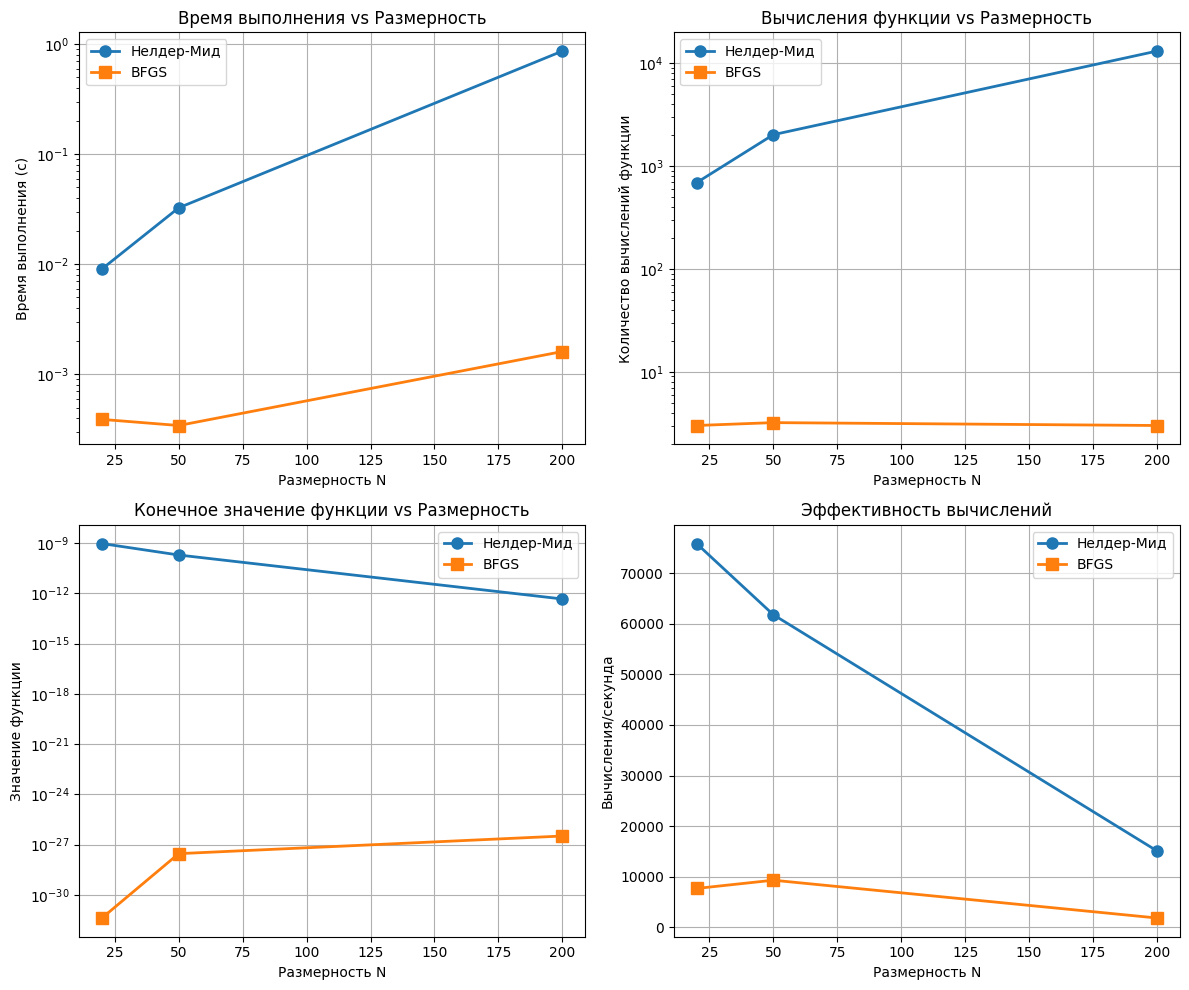


Сводная таблица результатов:
N		Метод		Время(с)	Значение		Вычисления
----------------------------------------------------------------------
20		Нелдер-Мид	0.0091		9.36e-10	689
20		BFGS		0.0004		4.14e-32	3

50		Нелдер-Мид	0.0327		1.94e-10	2017
50		BFGS		0.0003		2.88e-28	3

200		Нелдер-Мид	0.8679		4.60e-13	13116
200		BFGS		0.0016		3.25e-27	3

Проверка на N=20:
Аналитическое значение функции: 0.0000000000e+00
Нелдер-Мид значение функции: 1.8566825147e-10
BFGS значение функции: 0.0000000000e+00


In [16]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

def create_objective_function(L, b):
    def objective(x):
        return (np.dot(L, x) - b)**2
    return objective

def create_gradient(L, b):
    def gradient(x):
        return 2 * (np.dot(L, x) - b) * L
    return gradient

def run_optimization_experiment(N_values, num_experiments=5):
    results = {}
    
    for N in N_values:
        print(f"\nN = {N}")
        
        nelder_mead_times = []
        bfgs_times = []
        nelder_mead_results = []
        bfgs_results = []
        
        for exp in range(num_experiments):
            np.random.seed(exp + 42)
            L = np.random.randn(N)
            b = np.random.randn()
            
            objective = create_objective_function(L, b)
            gradient = create_gradient(L, b)
            
            x0 = np.random.randn(N)
            
            start_time = time.time()
            result_nm = minimize(objective, x0, method='Nelder-Mead')
            nm_time = time.time() - start_time
            
            start_time = time.time()
            result_bfgs = minimize(objective, x0, method='BFGS', jac=gradient)
            bfgs_time = time.time() - start_time
            
            nelder_mead_times.append(nm_time)
            bfgs_times.append(bfgs_time)
            nelder_mead_results.append(result_nm)
            bfgs_results.append(result_bfgs)
        
        results[N] = {
            'nelder_mead': {
                'times': nelder_mead_times,
                'results': nelder_mead_results,
                'avg_time': np.mean(nelder_mead_times),
                'avg_fun': np.mean([r.fun for r in nelder_mead_results]),
                'avg_nfev': np.mean([r.nfev for r in nelder_mead_results])
            },
            'bfgs': {
                'times': bfgs_times,
                'results': bfgs_results,
                'avg_time': np.mean(bfgs_times),
                'avg_fun': np.mean([r.fun for r in bfgs_results]),
                'avg_nfev': np.mean([r.nfev for r in bfgs_results])
            }
        }
        
        print(f"Нелдер-Мид: время = {results[N]['nelder_mead']['avg_time']:.4f}s, "
              f"значение = {results[N]['nelder_mead']['avg_fun']:.6e}, "
              f"вычисления = {results[N]['nelder_mead']['avg_nfev']:.0f}")
        
        print(f"BFGS: время = {results[N]['bfgs']['avg_time']:.4f}s, "
              f"значение = {results[N]['bfgs']['avg_fun']:.6e}, "
              f"вычисления = {results[N]['bfgs']['avg_nfev']:.0f}")
    
    return results

N_values = [20, 50, 200]
results = run_optimization_experiment(N_values)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

N_list = list(results.keys())
nm_times = [results[N]['nelder_mead']['avg_time'] for N in N_list]
bfgs_times = [results[N]['bfgs']['avg_time'] for N in N_list]

axes[0, 0].plot(N_list, nm_times, 'o-', label='Нелдер-Мид', linewidth=2, markersize=8)
axes[0, 0].plot(N_list, bfgs_times, 's-', label='BFGS', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Размерность N')
axes[0, 0].set_ylabel('Время выполнения (с)')
axes[0, 0].set_title('Время выполнения vs Размерность')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_yscale('log')

nm_nfev = [results[N]['nelder_mead']['avg_nfev'] for N in N_list]
bfgs_nfev = [results[N]['bfgs']['avg_nfev'] for N in N_list]

axes[0, 1].plot(N_list, nm_nfev, 'o-', label='Нелдер-Мид', linewidth=2, markersize=8)
axes[0, 1].plot(N_list, bfgs_nfev, 's-', label='BFGS', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Размерность N')
axes[0, 1].set_ylabel('Количество вычислений функции')
axes[0, 1].set_title('Вычисления функции vs Размерность')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_yscale('log')

nm_fun = [results[N]['nelder_mead']['avg_fun'] for N in N_list]
bfgs_fun = [results[N]['bfgs']['avg_fun'] for N in N_list]

axes[1, 0].plot(N_list, nm_fun, 'o-', label='Нелдер-Мид', linewidth=2, markersize=8)
axes[1, 0].plot(N_list, bfgs_fun, 's-', label='BFGS', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Размерность N')
axes[1, 0].set_ylabel('Значение функции')
axes[1, 0].set_title('Конечное значение функции vs Размерность')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_yscale('log')

efficiency_nm = [nm_nfev[i] / nm_times[i] for i in range(len(N_list))]
efficiency_bfgs = [bfgs_nfev[i] / bfgs_times[i] for i in range(len(N_list))]

axes[1, 1].plot(N_list, efficiency_nm, 'o-', label='Нелдер-Мид', linewidth=2, markersize=8)
axes[1, 1].plot(N_list, efficiency_bfgs, 's-', label='BFGS', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Размерность N')
axes[1, 1].set_ylabel('Вычисления/секунда')
axes[1, 1].set_title('Эффективность вычислений')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print("\nСводная таблица результатов:")
print("N\t\tМетод\t\tВремя(с)\tЗначение\t\tВычисления")
print("-" * 70)
for N in N_values:
    print(f"{N}\t\tНелдер-Мид\t{results[N]['nelder_mead']['avg_time']:.4f}\t\t"
          f"{results[N]['nelder_mead']['avg_fun']:.2e}\t{results[N]['nelder_mead']['avg_nfev']:.0f}")
    print(f"{N}\t\tBFGS\t\t{results[N]['bfgs']['avg_time']:.4f}\t\t"
          f"{results[N]['bfgs']['avg_fun']:.2e}\t{results[N]['bfgs']['avg_nfev']:.0f}")
    print()

np.random.seed(42)
N = 20
L = np.random.randn(N)
b = np.random.randn()
analytical_solution = L * b / np.dot(L, L)

objective = create_objective_function(L, b)
x0 = np.random.randn(N)

result_nm = minimize(objective, x0, method='Nelder-Mead')
result_bfgs = minimize(objective, x0, method='BFGS', jac=create_gradient(L, b))

print(f"Проверка на N=20:")
print(f"Аналитическое значение функции: {objective(analytical_solution):.10e}")
print(f"Нелдер-Мид значение функции: {result_nm.fun:.10e}")
print(f"BFGS значение функции: {result_bfgs.fun:.10e}")

Упражнение 21.6 (С ограничениями) Решить  используя штрафные функции.   (x ^ 2)/10 + (y ^ 2)/3 - (xy)/5 <= 6 (x ^ 2)/3 + (y ^ 2)/104 + (xy)/5 <= 3  

Параметр штрафа r = 1
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.000000
Штрафная функция: 0.000000
--------------------------------------------------
Параметр штрафа r = 10
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.000000
Штрафная функция: 0.000000
--------------------------------------------------
Параметр штрафа r = 100
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.000000
Штрафная функция: 0.000000
--------------------------------------------------
Параметр штрафа r = 1000
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.000000
Штрафная функция: 0.000000
--------------------------------------------------
Параметр штрафа r = 10000
Оптимальная точка: x = [0. 0.]
Значение целевой функции: 0.000000
Ограничение 1: 6.000000
Ограничение 2: 3.00000

/tmp/ipykernel_519940/3921094060.py:128: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


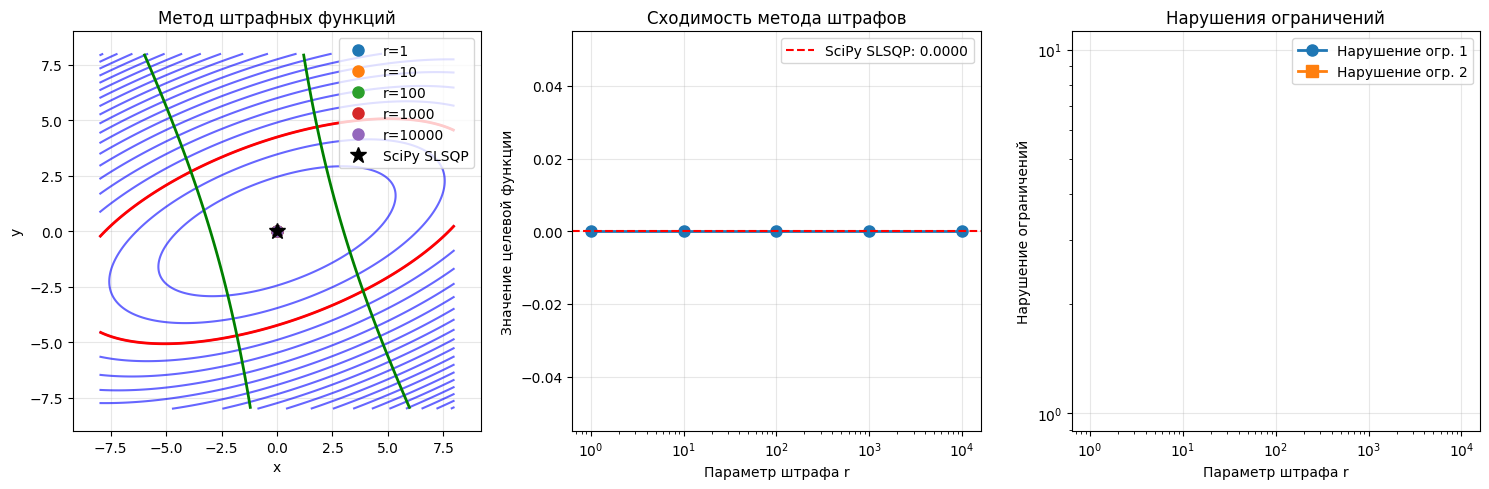


Сравнение результатов:
Метод штрафов (r=10000):
  x = [0.000000, 0.000000]
  f(x) = 0.000000
SciPy SLSQP:
  x = [0.000000, 0.000000]
  f(x) = 0.000000
Разность в значениях функции: 0.00000000
Расстояние между точками: 0.00000000

Теоретический минимум (грубая оценка по сетке):
  x = [0.020050, 0.020050]
  f(x) = 0.000094


In [17]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2/10 + x[1]**2/3 - x[0]*x[1]/5

def constraint1(x):
    return 6 - (x[0]**2/10 + x[1]**2/3 - x[0]*x[1]/5)

def constraint2(x):
    return 3 - (x[0]**2/3 + x[1]**2/104 + x[0]*x[1]/5)

def penalty_function(x, penalty_param):
    obj = objective_function(x)
    penalty = 0
    
    c1 = constraint1(x)
    if c1 < 0:
        penalty += penalty_param * c1**2
    
    c2 = constraint2(x)
    if c2 < 0:
        penalty += penalty_param * c2**2
    
    return obj + penalty

def solve_with_penalty_method():
    penalty_params = [1, 10, 100, 1000, 10000]
    results = []
    
    x0 = np.array([0.0, 0.0])
    
    for r in penalty_params:
        def penalized_objective(x):
            return penalty_function(x, r)
        
        result = minimize(penalized_objective, x0, method='BFGS')
        results.append((r, result))
        x0 = result.x
        
        print(f"Параметр штрафа r = {r}")
        print(f"Оптимальная точка: x = {result.x}")
        print(f"Значение целевой функции: {objective_function(result.x):.6f}")
        print(f"Ограничение 1: {constraint1(result.x):.6f}")
        print(f"Ограничение 2: {constraint2(result.x):.6f}")
        print(f"Штрафная функция: {result.fun:.6f}")
        print("-" * 50)
    
    return results

def solve_with_scipy_constraints():
    constraints = [
        {'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}
    ]
    
    x0 = np.array([0.0, 0.0])
    result = minimize(objective_function, x0, method='SLSQP', constraints=constraints)
    
    print("Решение с помощью встроенных ограничений scipy:")
    print(f"Оптимальная точка: x = {result.x}")
    print(f"Значение целевой функции: {result.fun:.6f}")
    print(f"Ограничение 1: {constraint1(result.x):.6f}")
    print(f"Ограничение 2: {constraint2(result.x):.6f}")
    print("-" * 50)
    
    return result

penalty_results = solve_with_penalty_method()
scipy_result = solve_with_scipy_constraints()

x_range = np.linspace(-8, 8, 400)
y_range = np.linspace(-8, 8, 400)
X, Y = np.meshgrid(x_range, y_range)

Z = X**2/10 + Y**2/3 - X*Y/5

C1 = X**2/10 + Y**2/3 - X*Y/5 - 6
C2 = X**2/3 + Y**2/104 + X*Y/5 - 3

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
contour = plt.contour(X, Y, Z, levels=20, colors='blue', alpha=0.6)
plt.contour(X, Y, C1, levels=[0], colors='red', linewidths=2, linestyles='-')
plt.contour(X, Y, C2, levels=[0], colors='green', linewidths=2, linestyles='-')

for i, (r, result) in enumerate(penalty_results):
    plt.plot(result.x[0], result.x[1], 'o', markersize=8, 
             label=f'r={r}')

plt.plot(scipy_result.x[0], scipy_result.x[1], '*', markersize=12, 
         color='black', label='SciPy SLSQP')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод штрафных функций')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(1, 3, 2)
penalty_params = [r for r, _ in penalty_results]
objective_values = [objective_function(result.x) for _, result in penalty_results]
plt.plot(penalty_params, objective_values, 'o-', linewidth=2, markersize=8)
plt.axhline(y=scipy_result.fun, color='red', linestyle='--', 
           label=f'SciPy SLSQP: {scipy_result.fun:.4f}')
plt.xlabel('Параметр штрафа r')
plt.ylabel('Значение целевой функции')
plt.title('Сходимость метода штрафов')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
constraint1_violations = [max(0, -constraint1(result.x)) for _, result in penalty_results]
constraint2_violations = [max(0, -constraint2(result.x)) for _, result in penalty_results]

plt.plot(penalty_params, constraint1_violations, 'o-', linewidth=2, 
         label='Нарушение огр. 1', markersize=8)
plt.plot(penalty_params, constraint2_violations, 's-', linewidth=2, 
         label='Нарушение огр. 2', markersize=8)
plt.xlabel('Параметр штрафа r')
plt.ylabel('Нарушение ограничений')
plt.title('Нарушения ограничений')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nСравнение результатов:")
final_penalty_result = penalty_results[-1][1]
print(f"Метод штрафов (r=10000):")
print(f"  x = [{final_penalty_result.x[0]:.6f}, {final_penalty_result.x[1]:.6f}]")
print(f"  f(x) = {objective_function(final_penalty_result.x):.6f}")

print(f"SciPy SLSQP:")
print(f"  x = [{scipy_result.x[0]:.6f}, {scipy_result.x[1]:.6f}]")
print(f"  f(x) = {scipy_result.fun:.6f}")

print(f"Разность в значениях функции: {abs(objective_function(final_penalty_result.x) - scipy_result.fun):.8f}")
print(f"Расстояние между точками: {np.linalg.norm(final_penalty_result.x - scipy_result.x):.8f}")

feasible_region = (C1 <= 0) & (C2 <= 0)
feasible_points = np.column_stack([X[feasible_region], Y[feasible_region]])

if len(feasible_points) > 0:
    feasible_obj_values = [objective_function([x, y]) for x, y in feasible_points]
    min_feasible_idx = np.argmin(feasible_obj_values)
    theoretical_min = feasible_points[min_feasible_idx]
    
    print(f"\nТеоретический минимум (грубая оценка по сетке):")
    print(f"  x = [{theoretical_min[0]:.6f}, {theoretical_min[1]:.6f}]")
    print(f"  f(x) = {objective_function(theoretical_min):.6f}")

In [ ]:
# Упражнение 21.7 Решить  используя барьерные функции.   (x ^ 2)/10 + (y ^ 2)/3 - (xy)/5 <= 6 (x ^ 2)/3 + (y ^ 2)/104 + (xy)/5 <= 3  


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2/10 + x[1]**2/3 - x[0]*x[1]/5

def constraint1(x):
    return 6 - (x[0]**2/10 + x[1]**2/3 - x[0]*x[1]/5)

def constraint2(x):
    return 3 - (x[0]**2/3 + x[1]**2/104 + x[0]*x[1]/5)

def barrier_function(x, barrier_param):
    obj = objective_function(x)
    barrier = 0
    
    c1 = constraint1(x)
    if c1 <= 0:
        return np.inf
    else:
        barrier += -barrier_param * np.log(c1)
    
    c2 = constraint2(x)
    if c2 <= 0:
        return np.inf
    else:
        barrier += -barrier_param * np.log(c2)
    
    return obj + barrier

def find_feasible_starting_point():
    for _ in range(1000):
        x = np.random.uniform(-2, 2, 2)
        if constraint1(x) > 0 and constraint2(x) > 0:
            return x
    return np.array([0.0, 0.0])

def solve_with_barrier_method():
    barrier_params = [1, 0.1, 0.01, 0.001, 0.0001]
    results = []
    
    x0 = find_feasible_starting_point()
    
    for mu in barrier_params:
        def barrier_objective(x):
            return barrier_function(x, mu)
        
        result = minimize(barrier_objective, x0, method='BFGS', 
                         options={'gtol': 1e-8, 'ftol': 1e-10})
        
        if result.success and constraint1(result.x) > 0 and constraint2(result.x) > 0:
            results.append((mu, result))
            x0 = result.x
            
            print(f"Барьерный параметр μ = {mu}")
            print(f"Оптимальная точка: x = {result.x}")
            print(f"Значение целевой функции: {objective_function(result.x):.8f}")
            print(f"Ограничение 1: {constraint1(result.x):.8f}")
            print(f"Ограничение 2: {constraint2(result.x):.8f}")
            print(f"Барьерная функция: {result.fun:.8f}")
            print("-" * 50)
        else:
            print(f"Неудачная оптимизация для μ = {mu}")
    
    return results

def solve_with_scipy_constraints():
    constraints = [
        {'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}
    ]
    
    x0 = find_feasible_starting_point()
    result = minimize(objective_function, x0, method='SLSQP', constraints=constraints)
    
    print("Решение с помощью встроенных ограничений scipy:")
    print(f"Оптимальная точка: x = {result.x}")
    print(f"Значение целевой функции: {result.fun:.8f}")
    print(f"Ограничение 1: {constraint1(result.x):.8f}")
    print(f"Ограничение 2: {constraint2(result.x):.8f}")
    print("-" * 50)
    
    return result

barrier_results = solve_with_barrier_method()
scipy_result = solve_with_scipy_constraints()

x_range = np.linspace(-6, 6, 300)
y_range = np.linspace(-6, 6, 300)
X, Y = np.meshgrid(x_range, y_range)

Z = X**2/10 + Y**2/3 - X*Y/5

C1 = X**2/10 + Y**2/3 - X*Y/5 - 6
C2 = X**2/3 + Y**2/104 + X*Y/5 - 3

feasible = (C1 <= 0) & (C2 <= 0)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
levels = np.logspace(-2, 2, 20)
contour = plt.contour(X, Y, Z, levels=levels, colors='blue', alpha=0.6)
plt.contour(X, Y, C1, levels=[0], colors='red', linewidths=3, linestyles='-')
plt.contour(X, Y, C2, levels=[0], colors='green', linewidths=3, linestyles='-')

plt.contourf(X, Y, ~feasible, levels=[0.5, 1.5], colors=['lightgray'], alpha=0.3)

colors = ['orange', 'purple', 'brown', 'pink', 'cyan']
for i, (mu, result) in enumerate(barrier_results):
    plt.plot(result.x[0], result.x[1], 'o', markersize=10, 
             color=colors[i % len(colors)], label=f'μ={mu}')

plt.plot(scipy_result.x[0], scipy_result.x[1], '*', markersize=15, 
         color='black', label='SciPy SLSQP')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод барьерных функций')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.subplot(2, 2, 2)
barrier_params = [mu for mu, _ in barrier_results]
objective_values = [objective_function(result.x) for _, result in barrier_results]
plt.plot(barrier_params, objective_values, 'o-', linewidth=2, markersize=8)
plt.axhline(y=scipy_result.fun, color='red', linestyle='--', 
           label=f'SciPy SLSQP: {scipy_result.fun:.6f}')
plt.xlabel('Барьерный параметр μ')
plt.ylabel('Значение целевой функции')
plt.title('Сходимость метода барьеров')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
constraint1_values = [constraint1(result.x) for _, result in barrier_results]
constraint2_values = [constraint2(result.x) for _, result in barrier_results]

plt.plot(barrier_params, constraint1_values, 'o-', linewidth=2, 
         label='Запас огр. 1', markersize=8)
plt.plot(barrier_params, constraint2_values, 's-', linewidth=2, 
         label='Запас огр. 2', markersize=8)
plt.xlabel('Барьерный параметр μ')
plt.ylabel('Запас по ограничениям')
plt.title('Приближение к границе ограничений')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
barrier_terms = []
for mu, result in barrier_results:
    c1_val = constraint1(result.x)
    c2_val = constraint2(result.x)
    barrier_term = -mu * (np.log(c1_val) + np.log(c2_val))
    barrier_terms.append(barrier_term)

plt.plot(barrier_params, objective_values, 'o-', linewidth=2, 
         label='Целевая функция', markersize=8)
plt.plot(barrier_params, barrier_terms, 's-', linewidth=2, 
         label='Барьерный член', markersize=8)
total_values = [obj + barrier for obj, barrier in zip(objective_values, barrier_terms)]
plt.plot(barrier_params, total_values, '^-', linewidth=2, 
         label='Общая функция', markersize=8)

plt.xlabel('Барьерный параметр μ')
plt.ylabel('Значение')
plt.title('Компоненты барьерной функции')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nСравнение результатов:")
if barrier_results:
    final_barrier_result = barrier_results[-1][1]
    print(f"Метод барьеров (μ=0.0001):")
    print(f"  x = [{final_barrier_result.x[0]:.8f}, {final_barrier_result.x[1]:.8f}]")
    print(f"  f(x) = {objective_function(final_barrier_result.x):.8f}")

print(f"SciPy SLSQP:")
print(f"  x = [{scipy_result.x[0]:.8f}, {scipy_result.x[1]:.8f}]")
print(f"  f(x) = {scipy_result.fun:.8f}")

if barrier_results:
    print(f"Разность в значениях функции: {abs(objective_function(final_barrier_result.x) - scipy_result.fun):.10f}")
    print(f"Расстояние между точками: {np.linalg.norm(final_barrier_result.x - scipy_result.x):.10f}")

x_fine = np.linspace(-3, 3, 1000)
y_fine = np.linspace(-3, 3, 1000)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

C1_fine = X_fine**2/10 + Y_fine**2/3 - X_fine*Y_fine/5 - 6
C2_fine = X_fine**2/3 + Y_fine**2/104 + X_fine*Y_fine/5 - 3

feasible_fine = (C1_fine <= 0) & (C2_fine <= 0)

if np.any(feasible_fine):
    Z_fine = X_fine**2/10 + Y_fine**2/3 - X_fine*Y_fine/5
    Z_feasible = np.where(feasible_fine, Z_fine, np.inf)
    
    min_idx = np.unravel_index(np.argmin(Z_feasible), Z_feasible.shape)
    grid_optimum = [X_fine[min_idx], Y_fine[min_idx]]
    
    print(f"\nОптимум по сетке (приближенно):")
    print(f"  x = [{grid_optimum[0]:.8f}, {grid_optimum[1]:.8f}]")
    print(f"  f(x) = {objective_function(grid_optimum):.8f}")
    print(f"  Ограничение 1: {constraint1(grid_optimum):.8f}")
    print(f"  Ограничение 2: {constraint2(grid_optimum):.8f}")

print(f"\nАнализ барьерного метода:")
print(f"Количество успешных итераций: {len(barrier_results)}")
if len(barrier_results) >= 2:
    improvement = objective_function(barrier_results[0][1].x) - objective_function(barrier_results[-1][1].x)
    print(f"Улучшение целевой функции: {improvement:.8f}")
    
    initial_constraints = [constraint1(barrier_results[0][1].x), constraint2(barrier_results[0][1].x)]
    final_constraints = [constraint1(barrier_results[-1][1].x), constraint2(barrier_results[-1][1].x)]
    
    print(f"Приближение к границе:")
    print(f"  Ограничение 1: {initial_constraints[0]:.6f} → {final_constraints[0]:.6f}")
    print(f"  Ограничение 2: {initial_constraints[1]:.6f} → {final_constraints[1]:.6f}")